In [1]:
from Plot_Functions_TL import CollectData, CollectData_Prod_CoCaBO

import numpy as np
import pandas as pd
import json

import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

import scipy
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
#import matplotlib
from scipy.optimize import NonlinearConstraint


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)
from sklearn.model_selection import train_test_split


import seaborn as sns
import GPy
import GPyOpt
from numpy.random import seed


from matplotlib.font_manager import FontProperties
font = {'family' : 'Arial',
    'weight' : 'medium',
    'size'   : 20,
    'style'  : 'normal'}

In [2]:
root_path = './'
carbon_source_filepath = './'

In [3]:
Stock_solid = pd.read_excel(carbon_source_filepath+'CarbonSourceInfo.xlsx', 'Stocks_solid')
Stock_liquid = pd.read_excel(carbon_source_filepath+'CarbonSourceInfo.xlsx', 'Stocks_liquid')

Carbon_Names = Stock_solid['Carbon Source'].values.tolist()
Carbon_Names.append(Stock_liquid['Carbon Source'][1])
Carbon_Names.append(Stock_liquid['Carbon Source'][2])

In [4]:
Molecule_list = ['HSA'] #, '3B2'
N_round = 6
Molecule_Name = 'HSA'

In [5]:
Design, Design_all, Result, Titer_all, SP_all, OD_prod_all, OD_og_all = CollectData(
    root_path, carbon_source_filepath, Molecule_list,6)

Design_b, Design_all_b, Result_b, Titer_all_b, SP_all_b, OD_prod_all_b, OD_og_all_b, res_bench_b, res_bench_all_b = CollectData_Prod_CoCaBO(
root_path, carbon_source_filepath, Molecule_list,[6])


Limits = dict()
for m in Molecule_list:
    Limits[m] = {}
    

Limits['HSA'] ['bmmy_lb_sp'] = 6 * [ 3.7]
Limits['HSA'] ['bmmy_ub_sp'] = 6 * [4.2]


Limits['HSA'] ['bmmy_lb_titer'] = 6 * [ 40]
Limits['HSA'] ['bmmy_ub_titer'] = 6 * [ 47]

(11, 9)
(9,)
(11, 9)
(11, 9)
(11, 9)
(11, 9)
(11, 9)


## Heat Map

[0.5 1.5 2.5 3.5 4.5]


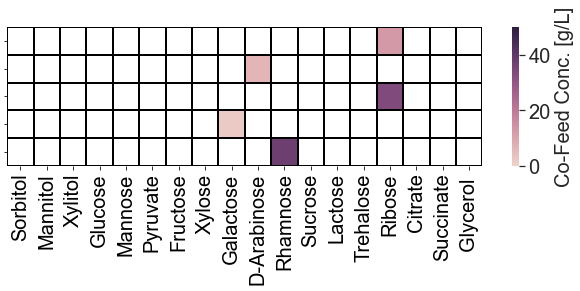

In [6]:
Carbon = np.zeros((5, len(Carbon_Names)  ))
Carbon = np.nan * np.ones((5, len(Carbon_Names)  ))

Carbon [0, int(Design_all['HSA'][151,0])] = Design_all['HSA'][151,1]
Carbon [1, int(Design_all['HSA'][121,0])] = Design_all['HSA'][121,1]
Carbon [2, int(Design_all['HSA'][96,0])] = Design_all['HSA'][96,1]
Carbon [3, int(Design_all['HSA'][4,0])] = Design_all['HSA'][4,1]
Carbon [4, int(Design_all['HSA'][97,0])] = Design_all['HSA'][97,1]


params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (11,4)
fig, axs = plt.subplots(1, 1) 
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)
sns.set(font = "Arial")

h_map = sns.heatmap(Carbon[:, :-1], linewidths=2,  linecolor = 'black',
            cmap= sns.cubehelix_palette(as_cmap=True),vmin=0, vmax=50, #'PuBuGn',
            yticklabels=['', '','', '',''], 
            xticklabels = Carbon_Names[:-1],cbar_kws={'label': 'Co-Feed Conc. [g/L]'})
print(h_map.get_yticks())
cbar = h_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='Co-Feed Conc. [g/L]', fontsize = 20, font = 'Arial')

plt.savefig("./Plots/TL/HeatMap_OptimalMedia_1.pdf", dpi = 600, bbox_inches = "tight")

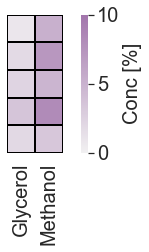

In [7]:
Gly_Met = np.zeros((5, 2 ))

Gly_Met[0,:] = Design_all['HSA'][151, 2:4]
Gly_Met[1,:] = Design_all['HSA'][121, 2:4]
Gly_Met[2,:] = Design_all['HSA'][96, 2:4]
Gly_Met [3,:] = Design_all['HSA'][4,2:4]
Gly_Met [4,:] = Design_all['HSA'][97,2:4]


params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (2,4)
fig, axs = plt.subplots(1, 1)
plt.gcf().subplots_adjust(bottom=0.4, right = 0.6, left = 0.0)
sns.set(font = "Arial")

h_map2 = sns.heatmap(Gly_Met, linewidths=2, linecolor = 'black', 
            cmap = sns.light_palette("#a275ac",as_cmap=True),  #"navy"
            yticklabels=['']*5, 
            xticklabels = ['Glycerol', 'Methanol'], 
           vmin=0, vmax=10, cbar_kws={'label': 'Conc [%]', 'pad': 0.2})

cbar2 = h_map2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label(label='Conc [%]', fontsize = 20, font = 'Arial') #, weight = 'bold'
plt.savefig("./Plots/TL/HeatMap_OptimalMedia_2.pdf", dpi = 600, bbox_inches = "tight")

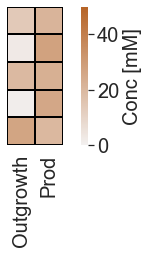

In [8]:
Gly_Met = np.zeros((5, 2 ))

Gly_Met[0,:] = Design_all['HSA'][151, [4,6]]
Gly_Met[1,:] = Design_all['HSA'][121, [4,6]]
Gly_Met[2,:] = Design_all['HSA'][96, [4, 6]]
Gly_Met [3,:] = Design_all['HSA'][4,[4, 6]]
Gly_Met [4,:] = Design_all['HSA'][97,[4, 6]]


params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (2,4)
fig, axs = plt.subplots(1, 1)
plt.gcf().subplots_adjust(bottom=0.4, right = 0.6, left = 0.0)
sns.set(font = "Arial")

h_map2 = sns.heatmap(Gly_Met, linewidths=2, linecolor = 'black', 
            cmap = sns.light_palette("xkcd:copper",as_cmap=True),  #"navy"
            yticklabels=['']*5, 
            xticklabels = ['Outgrowth', 'Prod'], 
           vmin=0, vmax=50, cbar_kws={'label': 'Conc [%]', 'pad': 0.2})

cbar2 = h_map2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label(label='Conc [mM]', fontsize = 20, font = 'Arial') #, weight = 'bold'
plt.savefig("./Plots/TL/HeatMap_OptimalMedia_3.pdf", dpi = 600, bbox_inches = "tight")

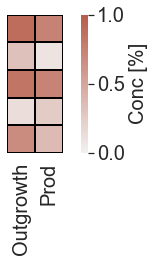

In [9]:
Gly_Met = np.zeros((5, 2 ))

Gly_Met[0,:] = Design_all['HSA'][151, [5,7]]
Gly_Met[1,:] = Design_all['HSA'][121, [5,7]]
Gly_Met[2,:] = Design_all['HSA'][96, [5, 7]]
Gly_Met [3,:] = Design_all['HSA'][4,[5, 7]]
Gly_Met [4,:] = Design_all['HSA'][97,[5, 7]]


params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (2,4)
fig, axs = plt.subplots(1, 1)
plt.gcf().subplots_adjust(bottom=0.4, right = 0.6, left = 0.0)
sns.set(font = "Arial")

h_map2 = sns.heatmap(Gly_Met, linewidths=2, linecolor = 'black', 
            cmap = sns.light_palette((20, 60, 50), input="husl",as_cmap=True),  #"navy"
            yticklabels=['']*5, 
            xticklabels = ['Outgrowth', 'Prod'], 
           vmin=0, vmax=1, cbar_kws={'label': 'Conc [%]', 'pad': 0.2})

cbar2 = h_map2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label(label='Conc [%]', fontsize = 20, font = 'Arial') #, weight = 'bold'
plt.savefig("./Plots/TL/HeatMap_OptimalMedia_4.pdf", dpi = 600, bbox_inches = "tight")

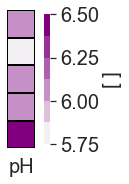

In [10]:
Gly_Met = np.zeros((5, 1))

Gly_Met[0,:] = Design_all['HSA'][151, [8]]
Gly_Met[1,:] = Design_all['HSA'][121, [8]]
Gly_Met[2,:] = Design_all['HSA'][96, [8]]
Gly_Met [3,:] = Design_all['HSA'][4,[8]]
Gly_Met [4,:] = Design_all['HSA'][97,[8]]


params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (1,4)
fig, axs = plt.subplots(1, 1)
plt.gcf().subplots_adjust(bottom=0.4, right = 0.6, left = 0.0)
sns.set(font = "Arial")

h_map2 = sns.heatmap(Gly_Met, linewidths=2, linecolor = 'black', 
            cmap = sns.light_palette("purple"),  #"navy"
            yticklabels=['']*5, 
            xticklabels = ['pH'], 
           vmin=5.75, vmax=6.5, cbar_kws={'label': 'Conc [%]', 'pad': 0.2})

cbar2 = h_map2.collections[0].colorbar
cbar2.ax.tick_params(labelsize=20)
cbar2.set_label(label='[ ]', fontsize = 20, font = 'Arial') #, weight = 'bold'
plt.savefig("./Plots/TL/HeatMap_OptimalMedia_5.pdf", dpi = 600, bbox_inches = "tight")

## Design Space

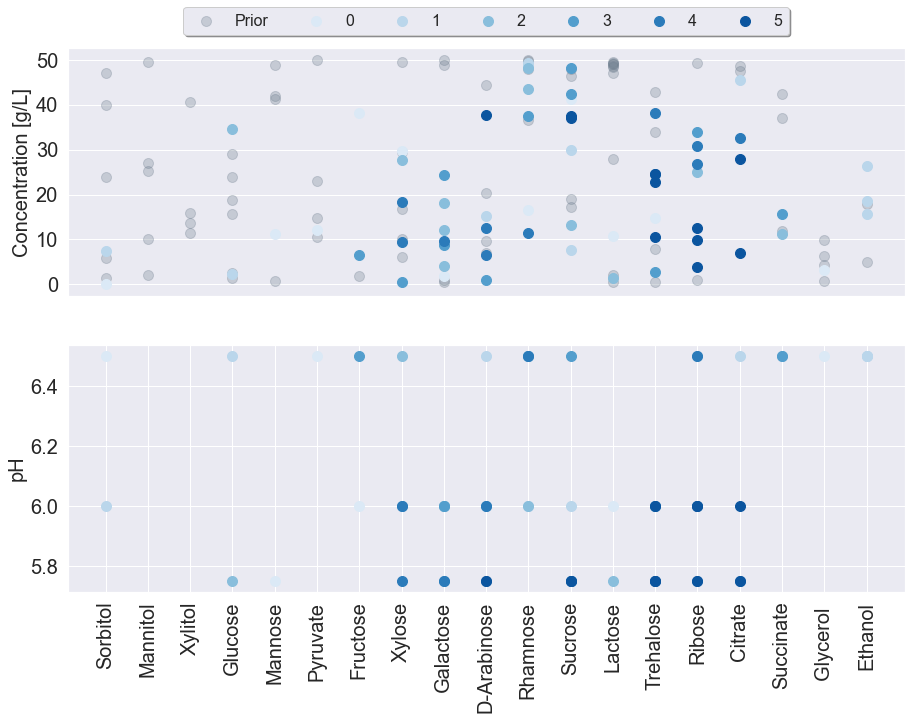

In [11]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(2, 1, gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

cmap = matplotlib.cm.get_cmap('Blues')

axs[0].scatter(Design_all_b[Molecule_Name][Design_all_b[Molecule_Name][:,1]!=0, 0], 
                     Design_all_b[Molecule_Name][Design_all_b[Molecule_Name][:,1]!=0, 1], s = 100, c = 'slategrey', alpha = 0.3)


for nr in range (6):
    axs[0].scatter(Design[Molecule_Name][nr][:, 0], Design[Molecule_Name][nr][:, 1], s = 100, 
                     c = [cmap((nr+1)/7)])
    axs[0].set_xticks(ticks=[]) #, labels=Carbon_Names, rotation = 90
    axs[0].set_ylabel('Concentration [g/L]', **hfont)#xlabel=Column_Names[1],
    axs[0].legend(['Prior', '0', '1', '2', 
                   '3','4','5','6'], loc = 'upper center',
                      bbox_to_anchor=(0.5, 1.2), fontsize = 16,
          ncol=7, fancybox=True, shadow=True)

for nr in range (6):
    axs[1].scatter(Design[Molecule_Name][nr][:, 0], Design[Molecule_Name][nr][:, 8], s = 100, 
                     c = [cmap((nr+1)/7)])
    axs[1].set_xticks(ticks=np.arange(0,19), labels=Carbon_Names, rotation = 90)
    axs[1].set_ylabel('pH', **hfont)#xlabel=Column_Names[1],

axs[1].set_xticklabels(Carbon_Names, **hfont)
plt.savefig('./Plots/TL/'+Molecule_Name+'_CS_pH_Conc_RoundEvol.png', dpi = 600,bbox_inches='tight')

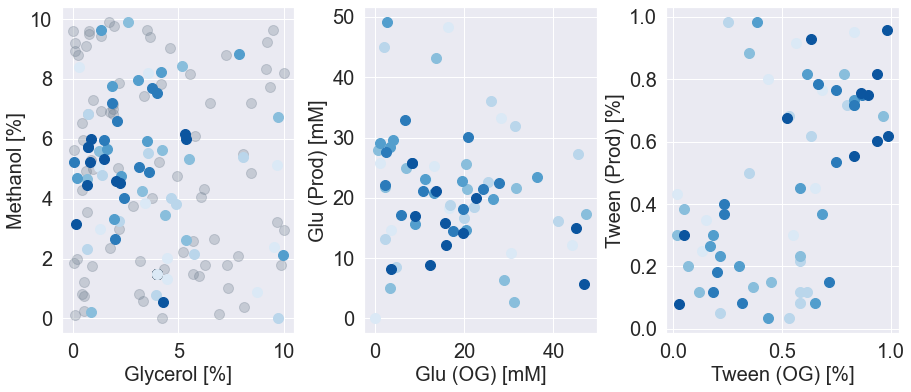

In [12]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'}
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (15,6)
fig, axs = plt.subplots(1, 3, gridspec_kw={'hspace': 0.6, 'wspace': 0.3})

# color_list = ['navy','purple','gold','rosybrown','slategray','tab:olive', 'tab:orange']
cmap = matplotlib.cm.get_cmap('Blues')


axs[0].scatter(Design_all_b[Molecule_Name][:, 2], 
                     Design_all_b[Molecule_Name][:, 3], s = 100, c = 'slategrey', alpha = 0.3)
axs[0].set_xlabel('Glycerol [%]', **hfont)
axs[0].set_ylabel('Methanol [%]',**hfont)


for nr in range (6):
    axs[0].scatter(Design[Molecule_Name][nr][:, 2], Design[Molecule_Name][nr][:, 3], s = 100, 
                     c = [cmap((nr+1)/7)])
    axs[0].set_xlabel('Glycerol [%]', **hfont)
#     axs[0].set_ylabel('Methanol [%]',**hfont)

for nr in range (6):
    axs[1].scatter(Design[Molecule_Name][nr][:, 4], Design[Molecule_Name][nr][:, 6], s = 100, 
                    c = [cmap((nr+1)/7)])
    axs[1].set_xlabel('Glu (OG) [mM]', **hfont)
    axs[1].set_ylabel('Glu (Prod) [mM]', **hfont)

for nr in range (6):
    axs[2].scatter(Design[Molecule_Name][nr][:, 5], Design[Molecule_Name][nr][:, 7], s = 100,
                    c = [cmap((nr+1)/7)])
    axs[2].set_xlabel('Tween (OG) [%]', **hfont)
    axs[2].set_ylabel('Tween (Prod) [%]',**hfont)
    
    
plt.savefig('./Plots/TL/'+Molecule_Name+'_DesignSpace_RoundEvolV2.png', dpi = 600,bbox_inches='tight')